<a href="https://colab.research.google.com/github/tracysilva01/CNN_dogs_vs_cats/blob/main/Copia_2_dog_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 1: Red convolucional en Keras**
##Tracy Emperatriz Silva Flores – Redes Neuronales – 01-05-2024


# **1. Programamos en Keras la red convolucional para clasificación binaria**

In [ ]:
# Importamos algunos paquetes necesarios que usaremos después
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
import os
import zipfile

# Montamos Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ruta al archivo zip con nuestros datos en Google Drive
zip_path = '/content/drive/My Drive/dogs-vs-cats2.zip'
# "dogs-vs-cats2.zip" es donde tenemos las imágenes clasificadas de perros y gatos

# Extraemos el archivo zip
extracted_path = '/content/dogs-vs-cats2'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Cargamos los datos utilizando ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Configuramos ImageDataGenerator para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255, # Reescalamos los píxeles a valores entre 0 y 1
)

test_datagen = ImageDataGenerator(rescale=1./255) # Configuramos ImageDataGenerator para el conjunto de prueba

# Creamos generadores de flujo de datos para el conjunto de entrenamiento y de validación
train_generator = train_datagen.flow_from_directory(
    os.path.join(extracted_path, 'train'), # Ruta al directorio de entrenamiento
    target_size=(224, 224), # Tamaño de las imágenes de entrada
    batch_size=20, # Tamaño de lote
    class_mode='categorical' # Modo de clasificación
)

validation_generator = test_datagen.flow_from_directory(
    os.path.join(extracted_path, 'test'), # Ruta al directorio de prueba
    target_size=(224, 224), # Tamaño de las imágenes de entrada
    batch_size=20,  # Tamaño de lote
    class_mode='categorical' # Modo de clasificación
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


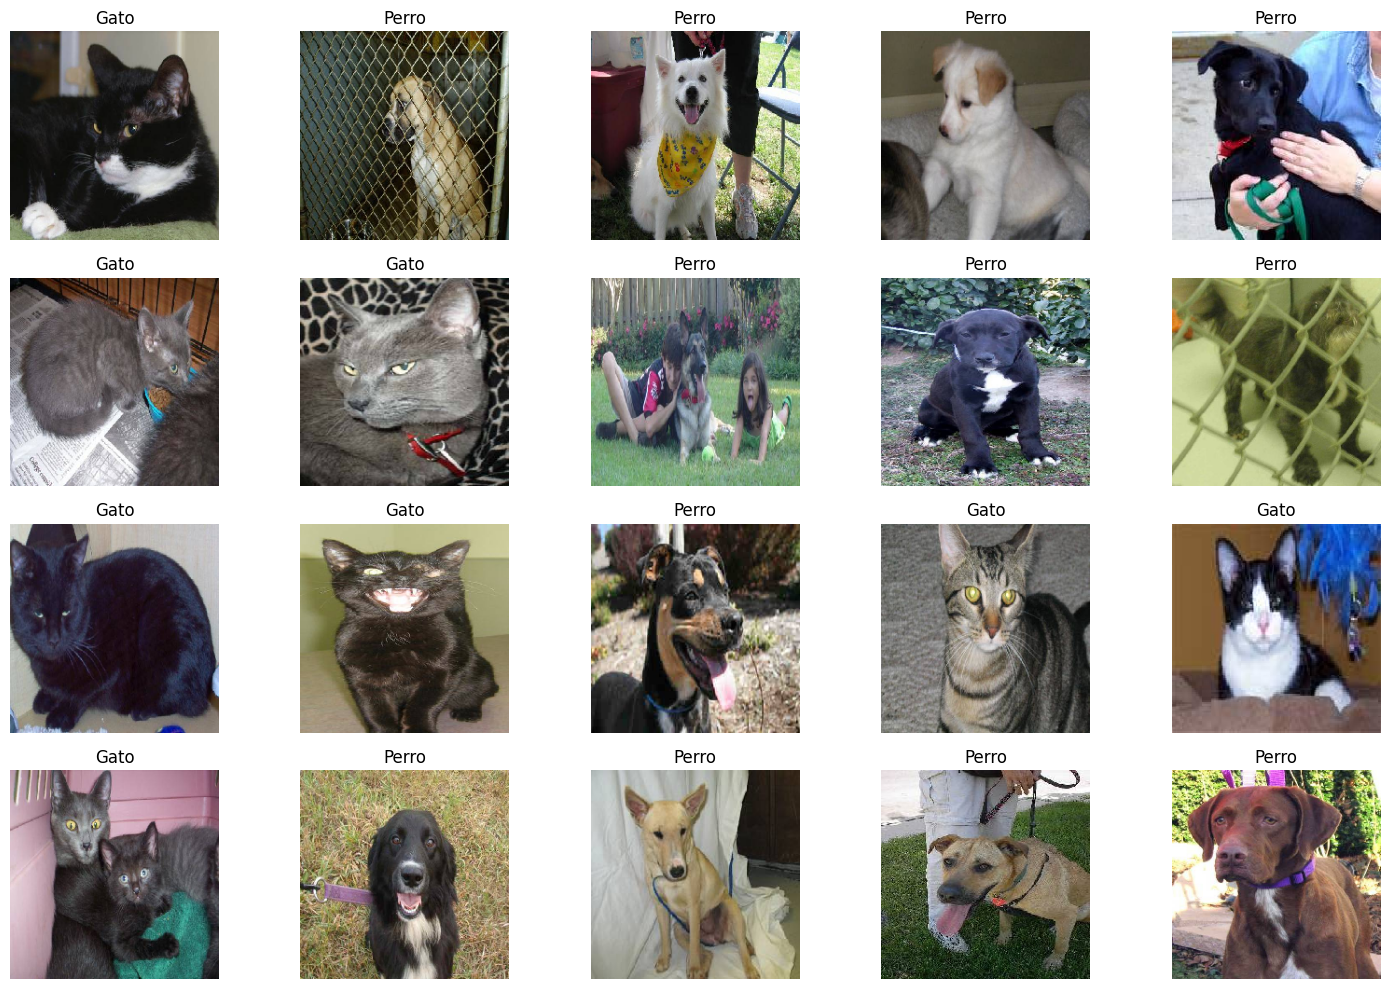

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ahora sacaremos algunas imágenes para comprobar que los datos son correctos
# (es decir, que los perros y gatos están correctamente clasificados)

# Extraemos un lote de datos de entrenamiento del generador
x_batch, y_batch = train_generator.next()

# Creamos una figura para mostrar las imágenes
plt.figure(figsize=(15, 10))

# # Iteramos sobre las imágenes en el lote, concretamente se visualizarán las primeras 20 imágenes del lote.
for i in range(20):
    plt.subplot(4, 5, i + 1)  # Organiza las imágenes en una cuadrícula de 4x5.
    plt.imshow(x_batch[i]) # Mostramos la imagen

    # Verificamos si la etiqueta de la imagen corresponde a un gato o un perro
    # Esto se hace comparando el índice del valor máximo en la etiqueta
    # Si el índice es 0, la imagen se etiqueta como "gato"; de lo contrario, se etiqueta como "perro"
    if np.argmax(y_batch[i]) == 0:
        plt.title('Gato')
    else:
        plt.title('Perro')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
# Importamos las clases necesarias desde Keras
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Definimos un punto de control para guardar el modelo con la mejor precisión en validación
checkpoint = ModelCheckpoint(
    "vgg16_1.keras",  # Nombre del archivo donde se guardará el modelo
    monitor='val_accuracy',  # Parámetro a monitorizar (precisión en validación)
    verbose=1,  # Nivel de verbosidad (1 para mostrar mensajes)
    save_best_only=True,  # Guardar solo el mejor modelo obtenido hasta ahora
    save_weights_only=False,  # Guardar el modelo completo, no solo los pesos
    mode='auto',  # Modo automático para determinar si un nuevo modelo es mejor que el anterior
)

# Definimos un EarlyStopping para detener el entrenamiento si la precisión en validación no mejora
early = EarlyStopping(
    monitor='val_accuracy',  # Parámetro a monitorizar (precisión en validación)
    min_delta=0,  # Diferencia mínima para considerar una mejora
    patience=20,  # Número de épocas para esperar antes de detener el entrenamiento
    verbose=1,  # Nivel de verbosidad (1 para mostrar mensajes)
    mode='auto'  # Modo automático para determinar si la precisión mejora o no
)

In [ ]:
# Importamos las clases necesarias desde Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.optimizers import RMSprop

# Creamos un modelo secuencial
model = Sequential()

# Añadimos una capa de convolución con 32 filtros, función de activación ReLU y tamaño de entrada de (224, 224, 3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Añadimos una capa de BatchNormalization para normalizar los valores de salida de la capa anterior
model.add(BatchNormalization())

# Añadimos una capa de MaxPooling para reducir el tamaño de la entrada
model.add(MaxPooling2D(pool_size=(2, 2)))

# Añadimos una capa de Dropout para regularizar el modelo y prevenir el sobreajuste
model.add(Dropout(0.25))

# Repetimos el mismo patrón para las siguientes dos capas de convolución
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Aplanamos la salida de la última capa convolucional para conectarla a capas completamente conectadas
model.add(Flatten())

# Añadimos una capa densa con 512 neuronas y función de activación ReLU
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Añadimos la capa de salida con dos neuronas (para clasificación binaria) y función de activación softmax
model.add(Dense(2, activation='softmax'))

# Definimos el optimizador RMSprop con una tasa de aprendizaje de 0.001
learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)

# Compilamos el modelo con pérdida categórica de entropía cruzada y métricas de precisión
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Mostramos un resumen del modelo, incluyendo información sobre la estructura y los parámetros
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      2

In [ ]:
# function to extract iterations
from collections import deque
import keras.callbacks

# Esta clase se utiliza para extraer las métricas de pérdida y precisión en cada iteración (batch) durante el entrenamiento del modelo.
class BatchHistory(keras.callbacks.Callback):
    # Se inicializan las listas vacías para almacenar las métricas.
    def on_train_begin(self, logs=None):
        self.epoch_losses = []
        self.epoch_accuracy = []
        self.batch_losses = []
        self.batch_accuracy = []
        # Define cada cuántos batches quieres registrar.
        self.log_every_n_batches = 3

    # Se registra la pérdida y precisión del lote actual si es múltiplo de log_every_n_batches.
    def on_batch_end(self, batch, logs=None):
        if batch % self.log_every_n_batches == 0:
            self.batch_losses.append(logs.get('loss'))
            self.batch_accuracy.append(logs.get('accuracy'))

    # Se agrega la lista de pérdidas y precisión del lote actual a la lista de la época.
    def on_epoch_end(self, epoch, logs=None):
        self.epoch_losses.append(self.batch_losses)
        self.epoch_accuracy.append(self.batch_accuracy)
        # Reinicia las listas del lote para la siguiente época.
        self.batch_losses = []
        self.batch_accuracy = []

In [ ]:
# Se instancia el objeto BatchHistory para registrar las métricas de cada batch.
batch_history = BatchHistory()

# Se entrena el modelo utilizando los generadores de datos de entrenamiento y validación.
# Además, se pasa el objeto batch_history como un callback para registrar las métricas de cada batch.
hist = model.fit(
    train_generator,  # Generador de datos de entrenamiento
    steps_per_epoch=100,  # Número de pasos por época
    validation_data=validation_generator,  # Generador de datos de validación
    validation_steps=10,  # Número de pasos de validación por época
    epochs=100,  # Número de épocas de entrenamiento
    callbacks=[checkpoint, early, batch_history]  # Lista de callbacks para monitorizar el entrenamiento
)

Epoch 1/100
  6/100 [>.............................] - ETA: 8s - loss: 2.0306 - accuracy: 0.5917

100/100 [==============================] - ETA: 0s - loss: 1.2380 - accuracy: 0.5735
Epoch 1: val_accuracy improved from -inf to 0.49500, saving model to vgg16_1.keras
100/100 [==============================] - 19s 121ms/step - loss: 1.2380 - accuracy: 0.5735 - val_loss: 1.8059 - val_accuracy: 0.4950
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.8799 - accuracy: 0.5985
Epoch 2: val_accuracy improved from 0.49500 to 0.50500, saving model to vgg16_1.keras
100/100 [==============================] - 12s 122ms/step - loss: 0.8799 - accuracy: 0.5985 - val_loss: 0.8557 - val_accuracy: 0.5050
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.7676 - accuracy: 0.6315
Epoch 3: val_accuracy improved from 0.50500 to 0.58000, saving model to vgg16_1.keras
100/100 [==============================] - 14s 139ms/step - loss: 0.7676 - accuracy: 0.6315 - val_loss: 0.6719 - val_accuracy: 0.5800
Epoch 4/100
100/100 [==============================] - ETA: 0s -

# 2. **Descripción gráfica de la red**

In [ ]:
pip install visualkeras
import visualkeras
visualkeras.layered_view(model, to_file='output.png').show()

# 3. **Evolución de la precisión y pérdida durante el entrenamiento**

Primero por épocas:

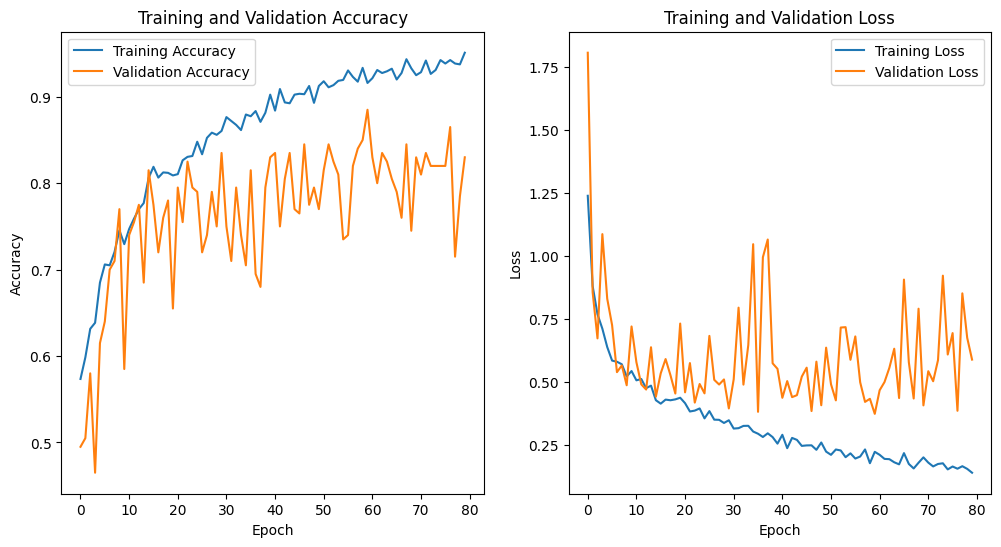

In [ ]:
import matplotlib.pyplot as plt

# Graficamos la precisión y la precisión de validación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history["accuracy"], label="Training Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Graficamos la pérdida y la pérdida de validación
plt.subplot(1, 2, 2)
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

Ahora por iteraciones:

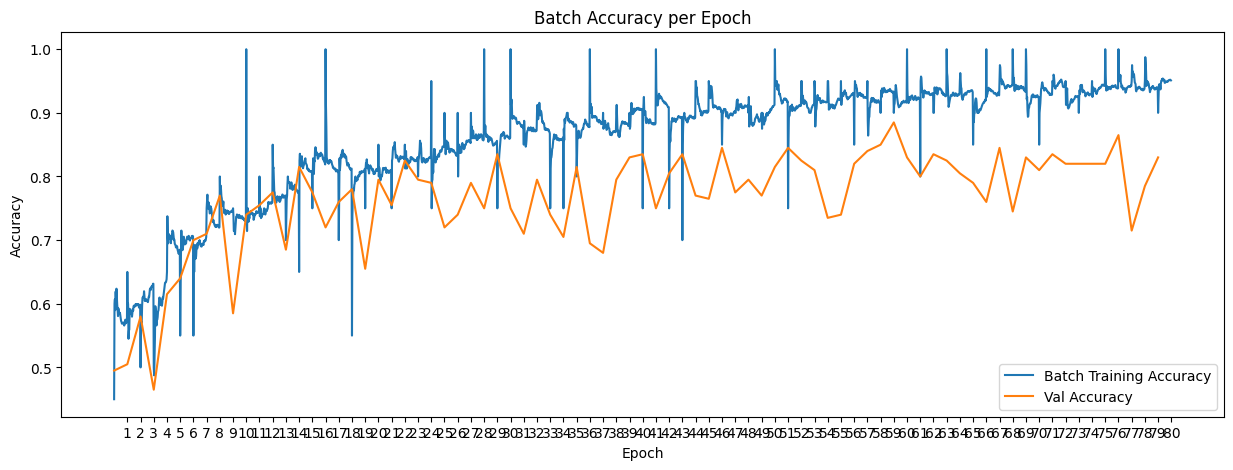

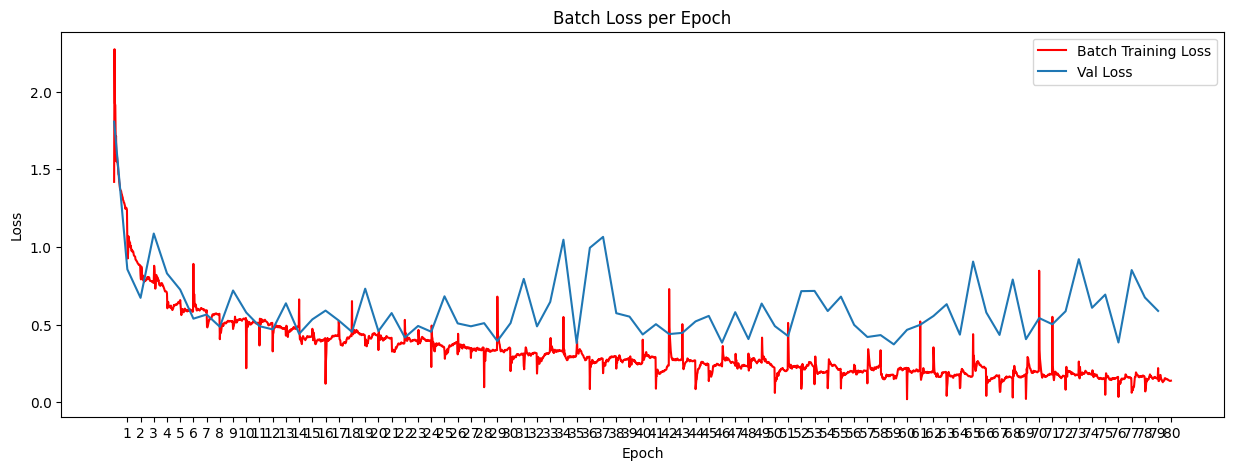

In [ ]:
import matplotlib.pyplot as plt

# Inicializamos listas para los puntos del eje x, precisión y valores de pérdida
epoch_points = []
accuracies = []
losses = []

# Calculamos la posición del eje x tanto para la precisión como para la pérdida
for epoch_idx, (batch_acc, batch_loss) in enumerate(zip(batch_history.epoch_accuracy, batch_history.epoch_losses)):
    for batch_idx, (acc, loss) in enumerate(zip(batch_acc, batch_loss)):
        offset = batch_idx / len(batch_acc)
        epoch_points.append(epoch_idx + offset)
        accuracies.append(acc)
        losses.append(loss)

# Graficamos la precisión
plt.figure(figsize=(15, 5))
plt.plot(epoch_points, accuracies, label='Batch Training Accuracy')   # Graficamos la precisión de entrenamiento por lote
plt.plot(hist.history['val_accuracy'], label='Val Accuracy')  # Graficamos la precisión de validación
plt.title('Batch Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(list(range(1, len(batch_history.epoch_accuracy) + 1)))  # Establecemos los ticks del eje x para que coincidan con las épocas
plt.show()

# Graficamos la pérdida
plt.figure(figsize=(15, 5))
plt.plot(epoch_points, losses, label='Batch Training Loss', color='red')  # Graficamos la pérdida de entrenamiento por lote
plt.plot(hist.history['val_loss'], label='Val Loss')  # Graficamos la pérdida de validación
plt.title('Batch Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.xticks(list(range(1, len(batch_history.epoch_losses) + 1)))  # Establecemos los ticks del eje x para que coincidan con las épocas
plt.show()

# 4. **Visualizar núcleos y activaciones**

Núcleos de convolución

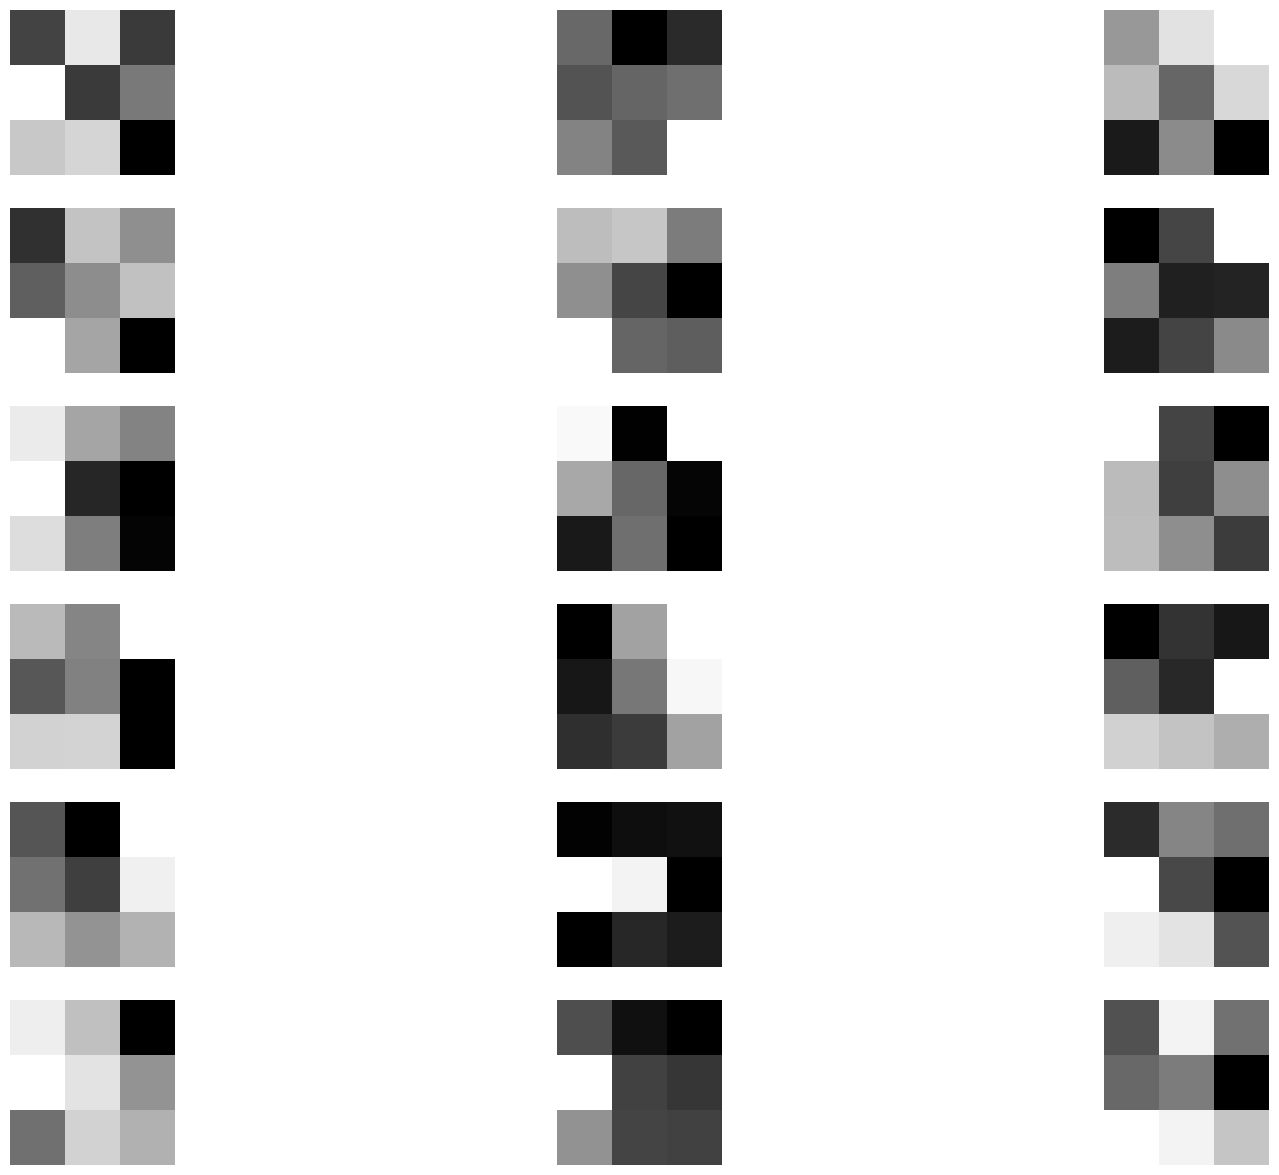

In [ ]:
def plot_conv_weights(model, layer_name):
    # Suponemos que layer_name es el nombre de una capa convolucional
    layer = model.get_layer(name=layer_name)
    filters, biases = layer.get_weights()
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)  # Normalizamos los filtros

    n_filters = 6  # Número de filtros para visualizar
    ix = 1
    fig = plt.figure(figsize=(20, 15))
    for i in range(n_filters):
        f = filters[:, :, :, i]
        for j in range(3):  # Suponemos que los filtros tienen 3 canales
            ax = fig.add_subplot(n_filters, 3, ix)
            ax.imshow(f[:, :, j], cmap='gray')  # Graficamos cada canal individualmente
            ax.axis('off')
            ax.set_title(f'{layer_name} - Filter {i+1}')  # Añadimos el nombre de la capa al título
            ix += 1
    plt.show()

# Núcleos de convolución para las tres capas convoluciones del modelo:
plot_conv_weights(model, 'conv2d')
plot_conv_weights(model, 'conv2d_1')
plot_conv_weights(model, 'conv2d_2')

Usamos una imagen aleatoria de un perro y hacemos que el modelo la clasifique.

1/1 [==============================] - 0s 410ms/step
dog


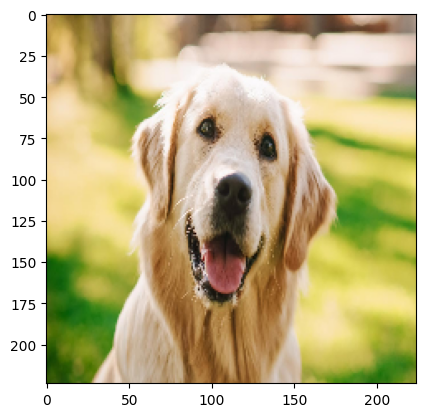

In [ ]:
from keras.preprocessing import image

# Ruta de la imagen
img_path = "/content/drive/My Drive/perro.jpeg"

# Cargar la imagen y redimensionarla
img = image.load_img(img_path, target_size=(224, 224))
img = np.asarray(img)

# Visualizar la imagen
plt.imshow(img)

# Expandir las dimensiones para adaptarse al modelo
img = np.expand_dims(img, axis=0)

from keras.models import load_model

# Cargar el modelo guardado
saved_model = load_model("vgg16_1.keras")

# Predecir la clase de la imagen
output = saved_model.predict(img)

# Imprimir el resultado
if output[0][0] > output[0][1]:
    print("Gato")
else:
    print('Perro')

Ahora le pedimos algunos mapas de activación de esta imagen.

1/1 [==============================] - 0s 134ms/step
(1, 222, 222, 32)
(1, 109, 109, 64)
(1, 52, 52, 128)


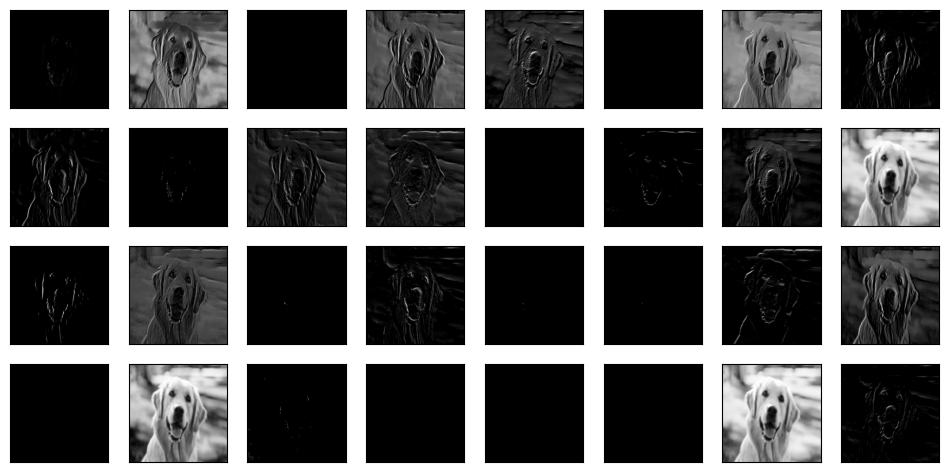

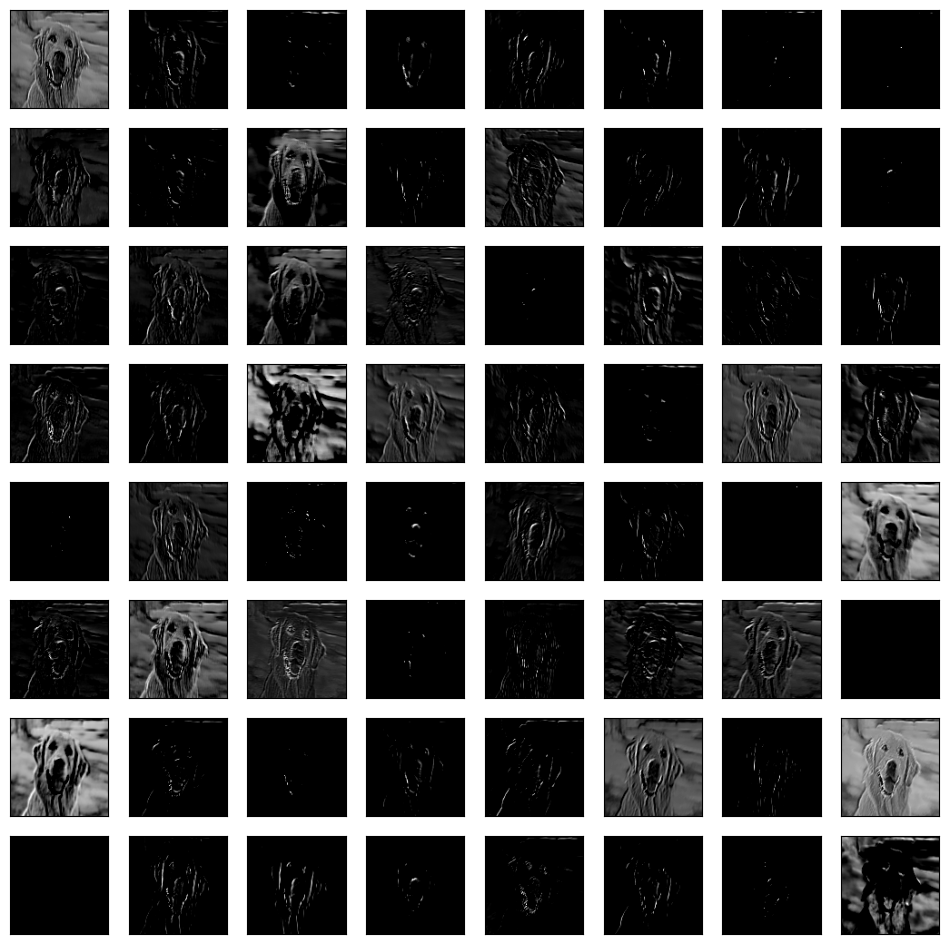

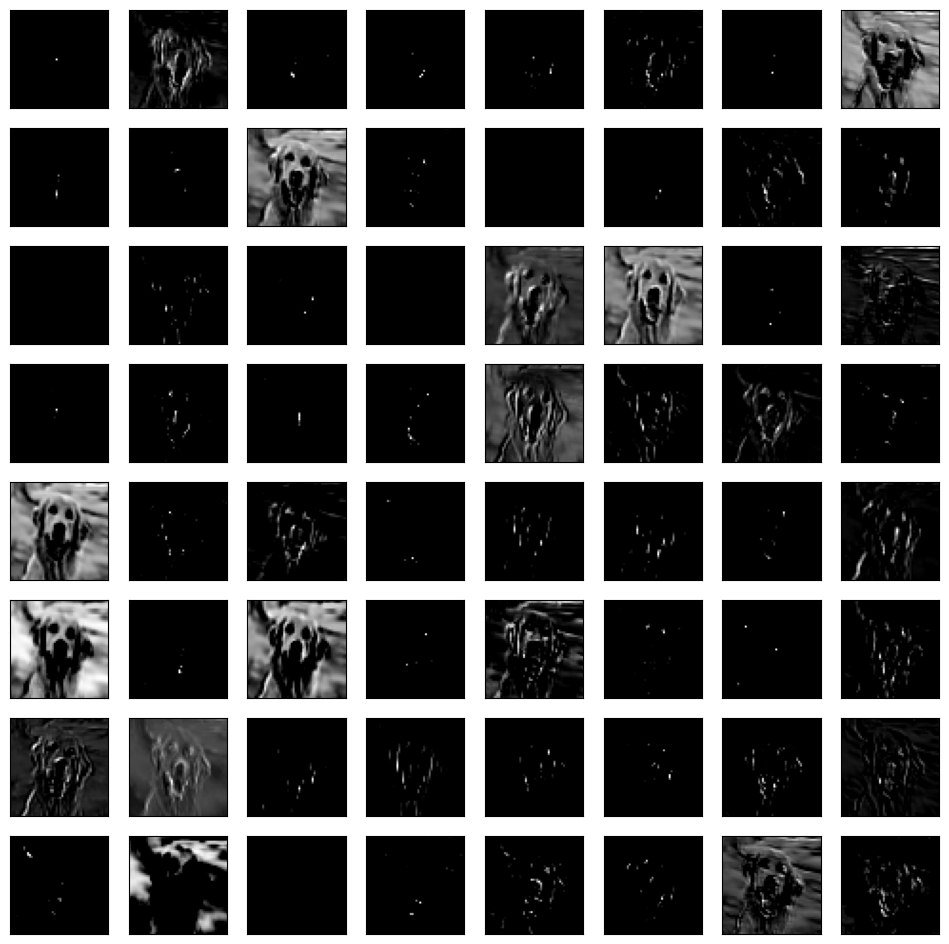

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# Cargamos nuestro modelo
from keras.models import load_model
model = load_model("vgg16_1.keras")

ixs = [0, 4, 8]  # Índices de las capas de interés
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

# Cargar y preparar la imagen
img_path = "/content/drive/My Drive/perro.jpeg"
img = image.load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)

# Obtener los mapas de características
feature_maps = model.predict(img)

# Imprimir las formas de cada mapa de características para diagnóstico
for fmap in feature_maps:
    print(fmap.shape)

# Índices de los mapas de características que deseas visualizar, elegimos solo algunos
maps_to_visualize = [0, 3, 5]  # Por ejemplo, visualizar el primer, cuarto y sexto mapa de características

# Código de visualización, ajustando según los datos de formas
for fmap_idx in maps_to_visualize:
    fmap = feature_maps[fmap_idx]  # Obtener el mapa de características correspondiente al índice
    ix = 1
    pyplot.figure(figsize=(12, 12))
    num_filters = fmap.shape[-1]
    for _ in range(min(square, num_filters)):
        for _ in range(min(square, num_filters)):
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            if ix < num_filters:  # Asegura no ir más allá del número de filtros en la capa
                ix += 1
    pyplot.show()

#5. **Sobreajuste**

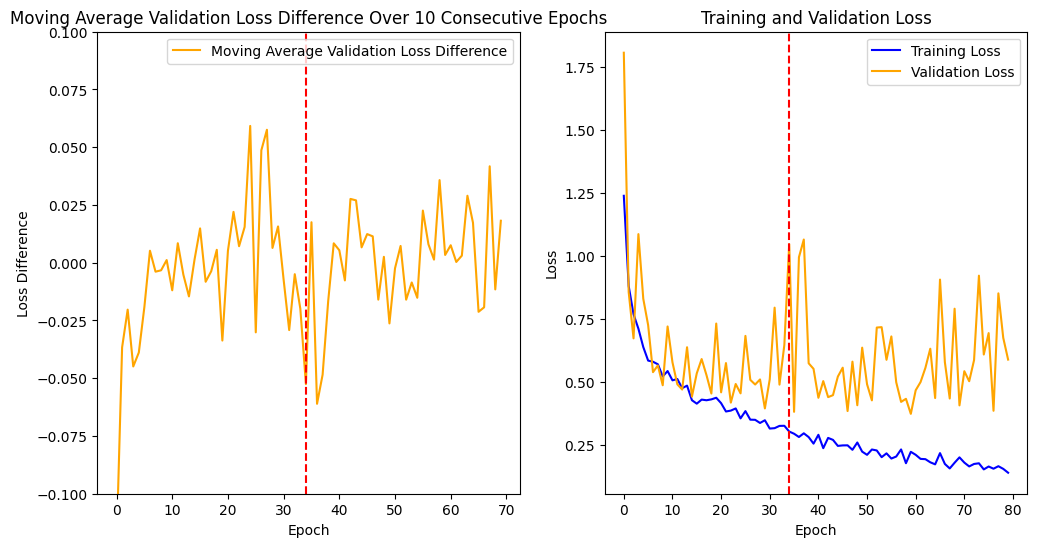

Inicio de sobreajuste detectado a partir de la época: 34


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def detect_overfitting(hist, threshold_diff=0.05, consecutive_epochs=10):
    # Obtener las métricas de pérdida del entrenamiento y validación
    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    # Calcular la media móvil de la pérdida de validación
    moving_avg_val_loss = np.convolve(val_loss, np.ones(consecutive_epochs)/consecutive_epochs, mode='valid')

    # Calcular la diferencia entre la media móvil de la pérdida de validación en épocas consecutivas
    loss_diff = np.diff(moving_avg_val_loss)

    # Graficar la diferencia de pérdida
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(loss_diff, label='Moving Average Validation Loss Difference', color='orange')
    plt.title(f'Moving Average Validation Loss Difference Over {consecutive_epochs} Consecutive Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Difference')
    plt.ylim(-0.1, 0.1)
    plt.legend()

    # Determinar el punto donde la diferencia de pérdida es significativa
    start_epoch = None
    for epoch in range(len(loss_diff)):
        if loss_diff[epoch] > threshold_diff:
            start_epoch = epoch + consecutive_epochs
            break

    # Añadir una línea vertical para indicar el inicio del sobreajuste
    if start_epoch is not None:
        plt.axvline(x=start_epoch, color='red', linestyle='--', label='Start of Overfitting')

    # Graficar la pérdida en entrenamiento y validación
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Añadir la línea vertical en la gráfica de entrenamiento y validación si se detecta el sobreajuste
    if start_epoch is not None:
        plt.axvline(x=start_epoch, color='red', linestyle='--', label='Start of Overfitting')

    plt.show()

    return start_epoch if start_epoch is not None else -1


inflection_epoch = detect_overfitting(hist, threshold_diff=0.05, consecutive_epochs=10)
# El sobreajuste se detectará si la diferencia de pérdida promedio en 10 épocas consecutivas supera el umbral de 0.05.

if inflection_epoch != -1:
    print("Inicio de sobreajuste detectado a partir de la época:", inflection_epoch)
else:
    print("No se detectó ningún inicio de sobreajuste.")